# PROBLEM DEFINITION :
# In this project we will predict the "Happiness Score" for the given data set.

# DATA DISCRIPTION:

# The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

# The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

# If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# As we infer that the "Region" column is in object type, so we will change that to integer type to use that as one of the constraints for prediction.

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(1), int64(1), object(1)
memor

# As we have changed the required columns into integer type, we will proceed with EDA.

In [9]:
df["Region"].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

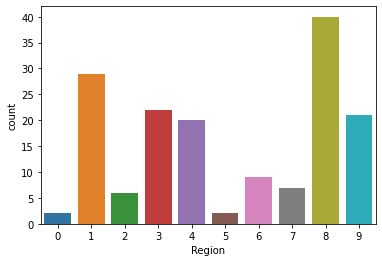

In [54]:
sn.countplot(x="Region",data=df)

# We could see that Sub-Saharan Africa have the highest entries in the data-set when compared toall other Regions.

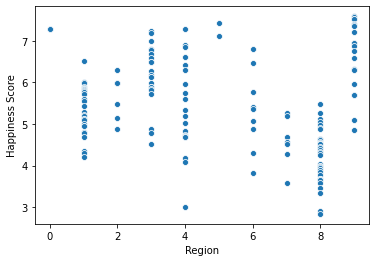

In [11]:
sn.scatterplot(x="Region",y="Happiness Score",data=df)

In [12]:
df.drop(["Country"],axis=1,inplace=True)
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Now we will see correlation between all the infromations in the data-set to finalise the importance of each attributes.

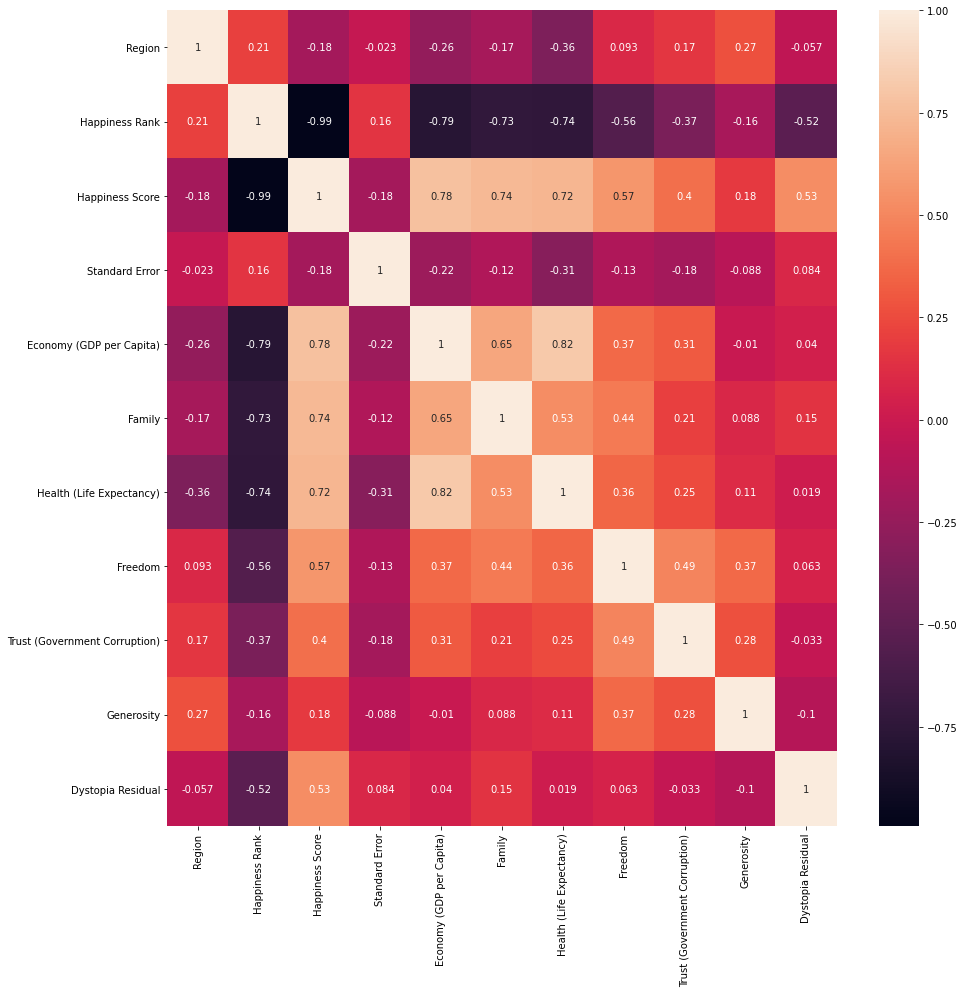

In [13]:
corr=df.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corr,annot=True)

# 1.We could see that Freedom,health,family,Economy are highly correlating in a positive manner.
# 2.whereas these same attributes highly correlate in a negative manner with Happiness Rank.
# 3.Also we could see that there may be high chance of outliers presen in the given data set.
# we will proceed to remove the outliers with the help of z-score.

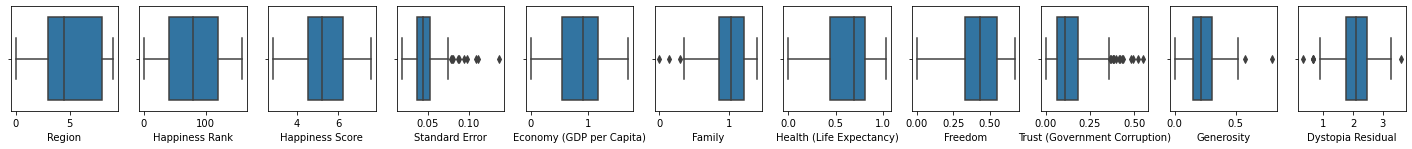

In [14]:
collist=df.columns.values
ncol=11
nrow=11
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sn.boxplot(df[collist[i]])

In [16]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.30025593, 1.72099989, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.30025593, 1.69907456, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.30025593, 1.67714922, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [0.37544095, 1.67742676, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [0.96511655, 1.69935209, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [0.96511655, 1.72127743, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [17]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# The above table suggest that the outliers have been removed from the given data-set.Now we will continue to train and test the given data-set with a machine learning model.

# TRAINING AND TESTING THE DATA-SET WITH MACHINE LEARNING MODEL:

In [18]:
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]

In [19]:
#testing and training of data-set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [20]:
x_train.shape

(123, 10)

In [21]:
y_train.shape

(123,)

In [22]:
x_test.shape

(35, 10)

In [23]:
y_test.shape

(35,)

# Now as we have splitted the given data-set, we will continue to test the data-set. 

In [60]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=99.99999439012613,cross_value_score=99.99999201767874,and difference=2.3724473976471927e-06


In [61]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=99.75772368741292,cross_value_score=99.36057476238716,and difference=0.3971489250257605


In [62]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGD,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=99.99999439012613,cross_value_score=-2.1362152679945852e+27,and difference=2.1362152679945852e+27


# From the above results of machine learning models we could see that "Linear Regression" have the highest Accuracy of 99.99% along with a negligible difference between the accuracy and cv score. now that we haveestablished that the Linear regression is the best model to test the data we will try to predict the given data-set with a sample data.

In [70]:
# TESTNG THE MACHINE LEARNING MODEL WITH SAMPLE DATA

In [63]:
td=np.array([64,5.3 ,0.30,1.23 ,1.3,0.8,0.6,0.4,0.3,2.4])
td.shape

(10,)

In [64]:
td=td.reshape(1,-1)
td

array([[64.  ,  5.3 ,  0.3 ,  1.23,  1.3 ,  0.8 ,  0.6 ,  0.4 ,  0.3 ,
         2.4 ]])

In [65]:
rf.predict(td)

array([7.38615])

Above we could see that the given sample gives out the happiness score as 7.3 for the given state.

# SAVING THE MODEL:

In [67]:
import joblib
joblib.dump(lr,"happiness_score_dataset.pkl")

['happiness_score_dataset.pkl']

# CONCLUSION:

In [68]:
a=np.array(y_test)
predicted=np.array(y_pred)
new=pd.DataFrame({"original":a,"predicted":predicted})
new.tail()

,original,predicted
30,3.781,3.780717
31,5.332,5.332490
32,3.995,3.994734
33,5.833,5.832687
34,4.350,4.349987


# THUS WE CAN SEE THAT THE MACHINE LEARNING MODEL IS WORKING PERFECTLY WITH THE HIGHEST ACCURACY RATE OF 99.99%.